In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('ToyotaCorolla.csv',encoding= 'unicode_escape',index_col=0)

In [6]:
data.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


In [7]:
data=data.loc[:,["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [8]:
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1438,7500,69,20544,86,1300,3,5,69,1025
1439,10845,72,19000,86,1300,3,5,69,1015
1440,8500,71,17016,86,1300,3,5,69,1015


In [9]:
data=data.rename({'Price':'price','Age_08_04':'age','KM':'km','HP':'hp','Doors':'doors','Gears':'gears','Quarterly_Tax':'tax','Weight':'weight'},axis=1)

In [10]:
data.shape

(1436, 9)

In [11]:
data.isnull().sum()

price     0
age       0
km        0
hp        0
cc        0
doors     0
gears     0
tax       0
weight    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   1436 non-null   int64
 1   age     1436 non-null   int64
 2   km      1436 non-null   int64
 3   hp      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   doors   1436 non-null   int64
 6   gears   1436 non-null   int64
 7   tax     1436 non-null   int64
 8   weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 112.2 KB


In [13]:
data.describe()


,price,age,km,hp,cc,doors,gears,tax,weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


<AxesSubplot:>

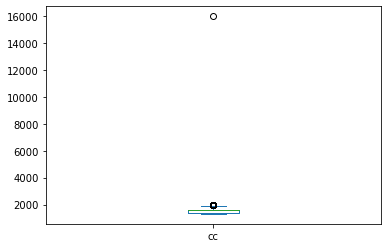

In [14]:
data['cc'].plot(kind='box')

In [15]:
data['cc'].quantile(0.999)

2000.0

In [16]:
data[data['cc']>2000]

,price,age,km,hp,cc,doors,gears,tax,weight
Id,,,,,,,,,
81,18950,25,20019,110,16000,5,5,100,1180


In [17]:
data.drop(data.index[80],inplace=True)

In [18]:
data.reset_index(drop=True,inplace=True)

In [19]:
data.iloc[75:85,:]

,price,age,km,hp,cc,doors,gears,tax,weight
75,16950,23,28000,110,1600,5,5,85,1115
76,18750,31,25266,110,1600,5,5,85,1130
77,18450,27,23489,110,1600,5,5,85,1115
78,16895,29,22575,110,1600,5,5,85,1115
79,14900,30,22000,97,1400,5,5,85,1110
80,17250,29,20000,110,1600,5,5,85,1115
81,15450,25,17003,97,1400,5,5,85,1110
82,17950,31,16238,110,1600,5,5,100,1180
83,16650,25,15414,97,1400,5,5,85,1110
84,17450,28,8537,110,1600,5,5,85,1130


In [20]:
data.describe()

,price,age,km,hp,cc,doors,gears,tax,weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10725.096864,55.968641,68567.067596,101.496167,1566.804878,4.032753,5.026481,87.113589,1072.384669
std,3621.726584,18.588504,37497.629827,14.984621,187.245640,0.952667,0.188575,41.141543,52.582788
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,2000.000000,5.000000,6.000000,283.000000,1615.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x28b9aaebfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x28b9aafb580>,
 'boxes': [<matplotlib.lines.Line2D at 0x28b9aaebcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x28b9aafbb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x28b9aafbdf0>],
 'means': []}

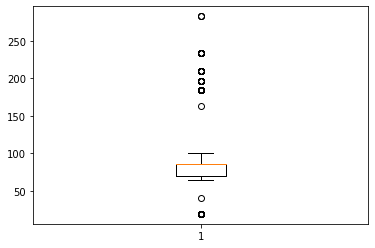

In [21]:
plt.boxplot(data=data,x='tax')

In [22]:
data

,price,age,km,hp,cc,doors,gears,tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# IQR Method

<AxesSubplot:xlabel='tax'>

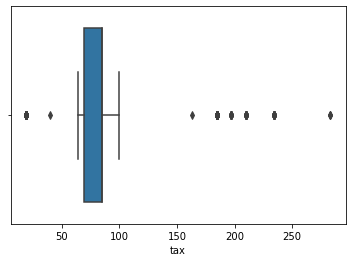

In [23]:
sns.boxplot(data['tax'])

In [24]:
q1=data['tax'].quantile(.25)
q3=data['tax'].quantile(.75)
iqr=q3-q1

In [25]:
upper_limit=q3+(1.5* iqr)
lower_limit=q1-(1.5* iqr)
upper_limit,lower_limit

(109.0, 45.0)

In [26]:
data=data.loc[(data['tax']<upper_limit) & (data['tax']>lower_limit)]
data

,price,age,km,hp,cc,doors,gears,tax,weight
8,21500,27,19700,192,1800,3,5,100,1185
10,20950,25,31461,192,1800,3,6,100,1185
11,19950,22,43610,192,1800,3,6,100,1185
12,19600,25,32189,192,1800,3,6,100,1185
13,21500,31,23000,192,1800,3,6,100,1185
...,...,...,...,...,...,...,...,...,...
1429,8450,80,23000,86,1300,3,5,69,1015
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015


<AxesSubplot:>

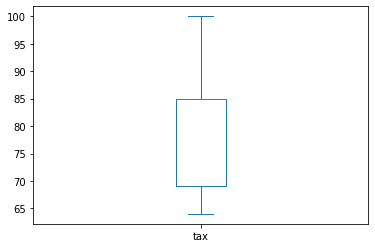

In [27]:
data['tax'].plot(kind='box')

In [28]:
data.describe()

,price,age,km,hp,cc,doors,gears,tax,weight
count,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000
mean,10614.738233,56.746491,63781.911643,103.777044,1522.649050,4.020644,5.030553,77.492981,1061.502064
std,3316.364017,17.918299,31290.614430,13.048980,137.420113,0.951938,0.203014,8.496606,35.023708
min,4350.000000,2.000000,1.000000,69.000000,1300.000000,3.000000,3.000000,64.000000,1000.000000
25%,8497.500000,46.000000,41236.500000,97.000000,1400.000000,3.000000,5.000000,69.000000,1035.000000
50%,9900.000000,61.000000,61149.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1060.000000
75%,11750.000000,70.000000,82062.000000,110.000000,1600.000000,5.000000,5.000000,85.000000,1075.000000
max,24500.000000,80.000000,203254.000000,192.000000,2000.000000,5.000000,6.000000,100.000000,1320.000000


<AxesSubplot:>

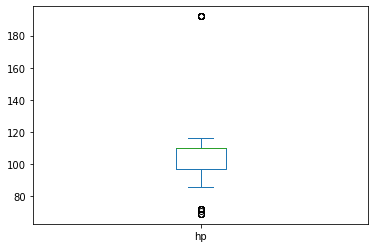

In [29]:
data['hp'].plot(kind='box')

In [30]:
q1=data['hp'].quantile(.25)
q3=data['hp'].quantile(.75)
iqr=q3-q1

In [31]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
upper_limit,lower_limit

(129.5, 77.5)

In [32]:
data=data.loc[(data['hp']<upper_limit) & (data['hp']>lower_limit)]

<AxesSubplot:>

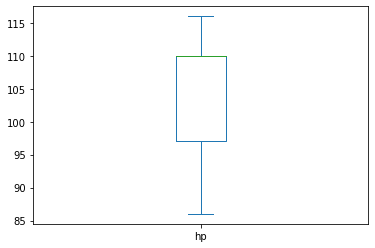

In [33]:
data['hp'].plot(kind='box')

<AxesSubplot:>

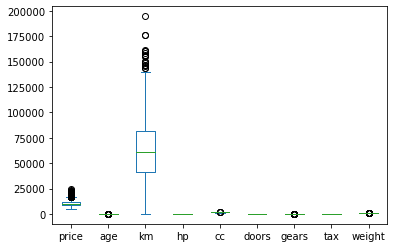

In [34]:
data.plot(kind='box')

In [35]:
q1=data['price'].quantile(.25)
q3=data['price'].quantile(.75)
iqr=q3-q1

In [36]:
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
upper,lower

(16625.0, 3625.0)

In [37]:
data=data.loc[(data['price']<upper) & (data['price']>lower)]

In [38]:
data

,price,age,km,hp,cc,doors,gears,tax,weight
20,15950,30,67660,110,1600,3,5,85,1105
22,15950,28,56349,110,1600,3,5,85,1120
24,16250,29,25813,110,1600,3,5,85,1120
25,15950,25,28450,110,1600,3,5,85,1120
27,15750,29,41415,110,1600,3,5,85,1120
...,...,...,...,...,...,...,...,...,...
1429,8450,80,23000,86,1300,3,5,69,1015
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015


<AxesSubplot:>

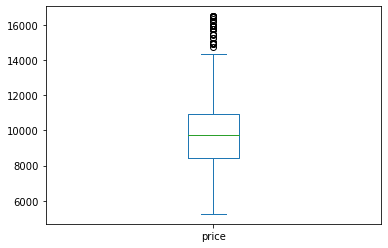

In [39]:
data['price'].plot(kind='box')

In [40]:
data.describe()

,price,age,km,hp,cc,doors,gears,tax,weight
count,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000
mean,9927.760181,59.883258,66403.236199,103.153846,1511.884163,3.990045,5.027149,76.841629,1054.836199
std,2171.466595,14.615790,28685.013481,9.890700,129.819883,0.951206,0.197781,8.039491,27.101048
min,5250.000000,14.000000,1.000000,86.000000,1300.000000,3.000000,3.000000,64.000000,1000.000000
25%,8450.000000,50.000000,45850.000000,97.000000,1400.000000,3.000000,5.000000,69.000000,1035.000000
50%,9750.000000,62.000000,63135.000000,110.000000,1600.000000,4.000000,5.000000,69.000000,1050.000000
75%,10950.000000,71.000000,83133.000000,110.000000,1600.000000,5.000000,5.000000,85.000000,1075.000000
max,16500.000000,80.000000,194545.000000,116.000000,2000.000000,5.000000,6.000000,100.000000,1260.000000


<AxesSubplot:>

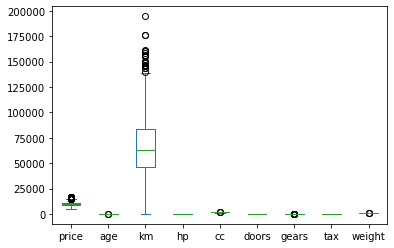

In [41]:
data.plot(kind='box')

In [42]:
q1=data['km'].quantile(.25)
q3=data['km'].quantile(.75)
iqr=q3-q1

In [43]:
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
upper,lower

(139057.5, -10074.5)

In [44]:
data=data.loc[(data['km']<upper) & (data['km']>lower)]

<AxesSubplot:>

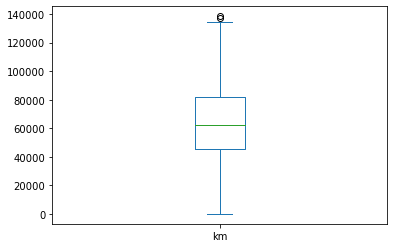

In [45]:
data['km'].plot(kind='box')

<AxesSubplot:>

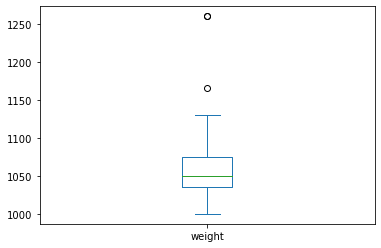

In [46]:
data['weight'].plot(kind='box')

In [47]:
q1=data['weight'].quantile(.25)
q3=data['weight'].quantile(.75)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
upper,lower

(1135.0, 975.0)

In [48]:
data=data.loc[(data['weight']<upper) & (data['weight']>lower)]

<AxesSubplot:>

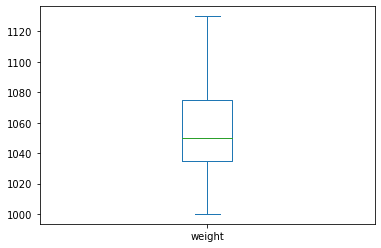

In [49]:
data['weight'].plot(kind='box')

<AxesSubplot:>

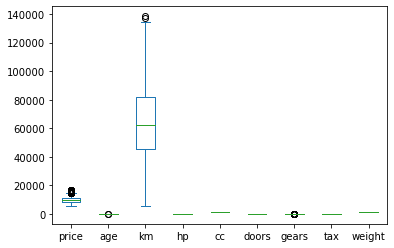

In [50]:
data.plot(kind='box')

In [51]:
data.describe()

,price,age,km,hp,cc,doors,gears,tax,weight
count,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000
mean,9980.207948,59.722736,64774.915896,103.263401,1511.397412,3.994455,5.025878,76.928835,1054.486137
std,2143.264423,14.618264,26051.637068,9.822850,126.876097,0.951150,0.195404,8.001129,25.321618
min,5250.000000,14.000000,5309.000000,86.000000,1300.000000,3.000000,3.000000,69.000000,1000.000000
25%,8460.000000,50.000000,45517.500000,97.000000,1400.000000,3.000000,5.000000,69.000000,1035.000000
50%,9750.000000,62.000000,62457.500000,110.000000,1600.000000,4.000000,5.000000,69.000000,1050.000000
75%,10950.000000,71.000000,82000.000000,110.000000,1600.000000,5.000000,5.000000,85.000000,1075.000000
max,16500.000000,80.000000,138500.000000,116.000000,1600.000000,5.000000,6.000000,85.000000,1130.000000


In [52]:
q1=data['km'].quantile(.25)
q3=data['km'].quantile(.75)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
upper,lower

(136723.75, -9206.25)

<AxesSubplot:>

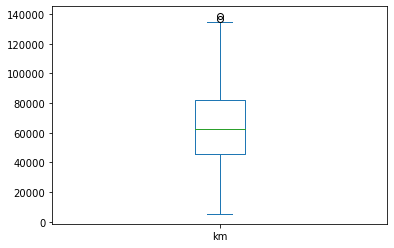

In [53]:
data['km'].plot(kind='box')

In [54]:
data=data.loc[(data['km']<upper) & (data['km']>lower)]

<AxesSubplot:>

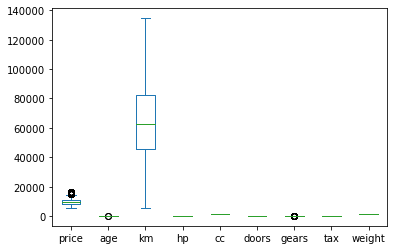

In [55]:
data.plot(kind='box')

In [56]:
q1=data['price'].quantile(.25)
q3=data['price'].quantile(.75)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
upper,lower

(14700.0, 4700.0)

<AxesSubplot:>

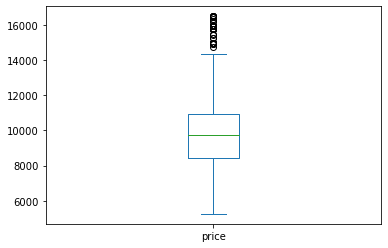

In [57]:
data['price'].plot(kind='box')

In [58]:
data=data.loc[data['price']<upper]

<AxesSubplot:>

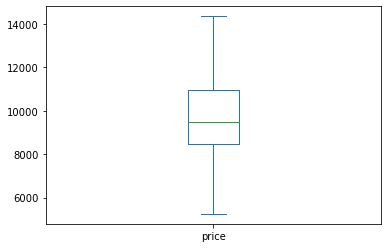

In [59]:
data['price'].plot(kind='box')

<AxesSubplot:>

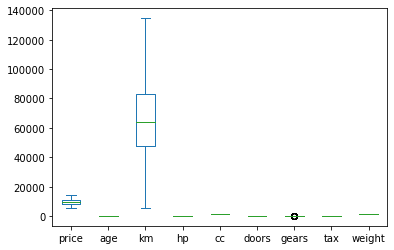

In [60]:
data.plot(kind='box')

In [61]:
data.describe()

,price,age,km,hp,cc,doors,gears,tax,weight
count,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000
mean,9709.899127,61.317168,66095.276431,103.394762,1514.095053,3.993210,5.026188,76.560621,1052.166828
std,1779.593270,12.817437,25436.469987,9.948134,127.702509,0.948659,0.197786,7.989432,23.255760
min,5250.000000,22.000000,5309.000000,86.000000,1300.000000,3.000000,3.000000,69.000000,1000.000000
25%,8450.000000,52.000000,47355.000000,97.000000,1400.000000,3.000000,5.000000,69.000000,1035.000000
50%,9500.000000,63.000000,64000.000000,110.000000,1600.000000,4.000000,5.000000,69.000000,1050.000000
75%,10950.000000,72.000000,82770.000000,110.000000,1600.000000,5.000000,5.000000,85.000000,1075.000000
max,14350.000000,80.000000,134539.000000,116.000000,1600.000000,5.000000,6.000000,85.000000,1115.000000


In [62]:
q1=data["gears"].quantile(.25)
q3=data["gears"].quantile(.75)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
upper,lower

(5.0, 5.0)

In [63]:
#data1=data.loc[(data['gears']<upper) & (data['gears']>lower)]

In [64]:
#data1

In [65]:
#data.to_csv("ToyotaCorolla_cleaned.csv")

In [66]:
data.loc[data["gears"]<=4]

,price,age,km,hp,cc,doors,gears,tax,weight
955,10950,58,51421,110,1600,5,3,85,1105
990,7950,58,43000,110,1600,4,3,72,1114
1425,9950,78,30964,110,1600,3,4,85,1080


In [67]:
data1=data.loc[data["gears"]==6]
data1

,price,age,km,hp,cc,doors,gears,tax,weight
443,11750,48,75045,110,1600,3,6,85,1055
460,11950,49,69659,86,1300,3,6,69,1025
585,9950,55,29650,86,1300,3,6,69,1025
642,10950,57,118833,110,1600,3,6,85,1065
658,10500,66,112000,110,1600,3,6,85,1065
660,9750,65,111769,110,1600,3,6,85,1065
682,8950,63,101469,110,1600,3,6,85,1065
690,9950,61,97648,110,1600,3,6,85,1065
708,9450,65,92226,110,1600,3,6,85,1065
729,11500,65,85889,110,1600,3,6,85,1065


In [68]:
data.drop(data.index[[630,663,1022]],inplace=True)


In [69]:
data.shape

(1028, 9)

In [70]:
data.reset_index(drop=True,inplace=True)

In [71]:
data.shape

(1028, 9)

<AxesSubplot:>

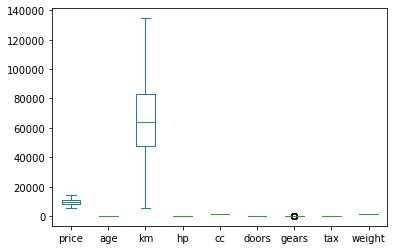

In [72]:
data.plot(kind='box')

<AxesSubplot:>

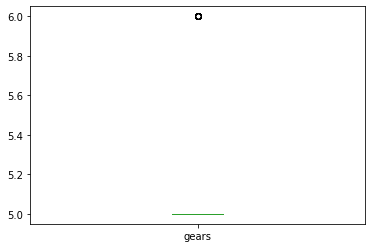

In [73]:
data["gears"].plot(kind='box')

In [74]:
#data.to_excel("ToyotaCrallo_cleaned_final.xlsx")

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
data.corr()

,price,age,km,hp,cc,doors,gears,tax,weight
price,1.000000,-0.813032,-0.475843,0.221537,0.191060,0.223534,0.068630,0.333105,0.315905
age,-0.813032,1.000000,0.429697,-0.115284,-0.070639,-0.116152,0.010122,-0.168904,-0.130097
km,-0.475843,0.429697,1.000000,0.048256,0.068937,0.001240,0.032283,-0.016506,0.032329
hp,0.221537,-0.115284,0.048256,1.000000,0.994406,0.192052,0.092303,0.474046,0.681621
cc,0.191060,-0.070639,0.068937,0.994406,1.000000,0.192150,0.094582,0.470712,0.688094
doors,0.223534,-0.116152,0.001240,0.192052,0.192150,1.000000,-0.187679,0.618969,0.603131
gears,0.068630,0.010122,0.032283,0.092303,0.094582,-0.187679,1.000000,0.167218,0.078752
tax,0.333105,-0.168904,-0.016506,0.474046,0.470712,0.618969,0.167218,1.000000,0.843675
weight,0.315905,-0.130097,0.032329,0.681621,0.688094,0.603131,0.078752,0.843675,1.000000


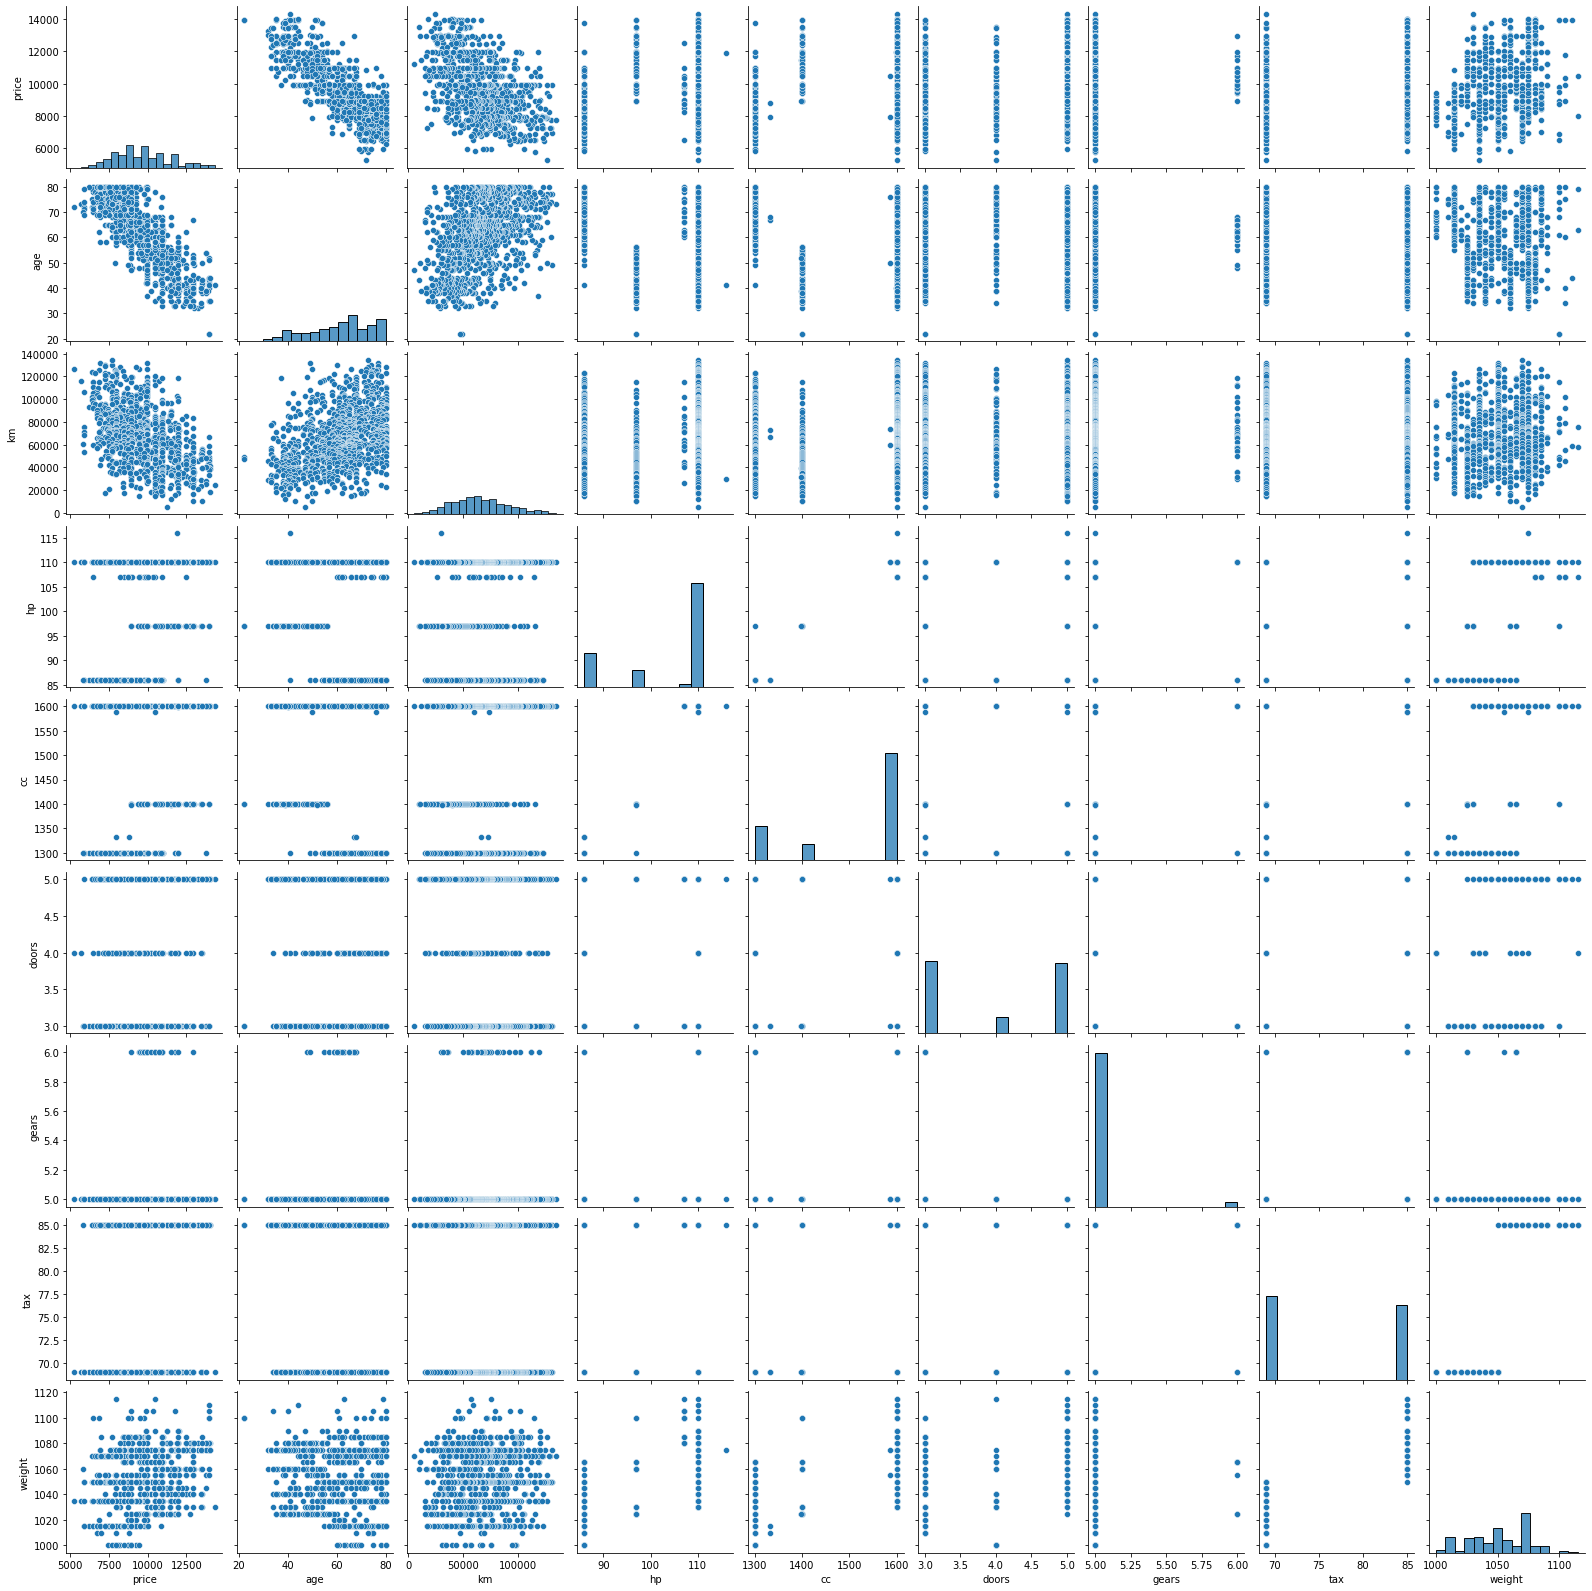

In [77]:
sns.pairplot(data)

In [78]:
x=data.iloc[:,[1,2,8]]
y=data.iloc[:,[0]]

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.30,random_state=9)

In [81]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)

In [82]:
model.score(x_train,y_train)

0.7300743603618163

In [83]:
model.coef_

array([[-9.70359343e+01, -1.37436968e-02,  1.68924619e+01]])

In [84]:
model.intercept_

array([-1194.82154938])

In [85]:
prediction=model.predict(x_train)

In [86]:
model.score(x_test,y_test)

0.73482368190555

In [87]:
data.tail()

,price,age,km,hp,cc,doors,gears,tax,weight
1023,8450,80,23000,86,1300,3,5,69,1015
1024,7500,69,20544,86,1300,3,5,69,1025
1025,10845,72,19000,86,1300,3,5,69,1015
1026,8500,71,17016,86,1300,3,5,69,1015
1027,7250,70,16916,86,1300,3,5,69,1015


In [88]:
model.score(x_train,y_train)

0.7300743603618163

In [89]:
data1=pd.DataFrame({'Age_08_04':80,'KM':23000,'Weight':1015},index=[1])

In [90]:
data1

,Age_08_04,KM,Weight
1,80,23000,1015


In [91]:
model.predict(data1)

array([[7872.04751937]])

In [92]:
import joblib

In [93]:
joblib.dump(model,'ToyotaCorallo.pkl')

['ToyotaCorallo.pkl']

# Using Ridge

In [94]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error

In [95]:
r=Ridge(alpha=2)
model=r.fit(x_train,y_train)

In [96]:
model.score(x_train,y_train)

0.7300743601817774

In [97]:
y_pred=model.predict(x_test)

In [98]:
model.score(x_test,y_test)

0.7348231317505796

In [99]:
mean_squared_error(y_pred,y_test)

892322.9331118142

In [100]:
model.coef_

array([[-9.70338643e+01, -1.37441143e-02,  1.68925441e+01]])

# Now we use lasso

In [101]:
r=Lasso(alpha=2)
model=r.fit(x_train,y_train)

In [102]:
model.score(x_train,y_train)

0.7300743495160493

In [103]:
y_pred=model.predict(x_test)

In [104]:
mean_squared_error(y_pred,y_test)

892343.1065867376

In [105]:
ela=ElasticNet(alpha=4,l1_ratio=0.1)
model=ela.fit(x_train,y_train)

In [106]:
model.score(x_train,y_train)

0.7297882677904073

In [107]:
y_pred=model.predict(x_test)

In [108]:
mean_squared_error(y_pred,y_test)

895596.3584030444